# Linear Regression Code with Sklearn

Ames Housing Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [3]:
df = pd.read_csv('ames.csv')

data = df.loc[df['Neighborhood'] == 'SWISU', ['LotArea', 'SalePrice']]

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


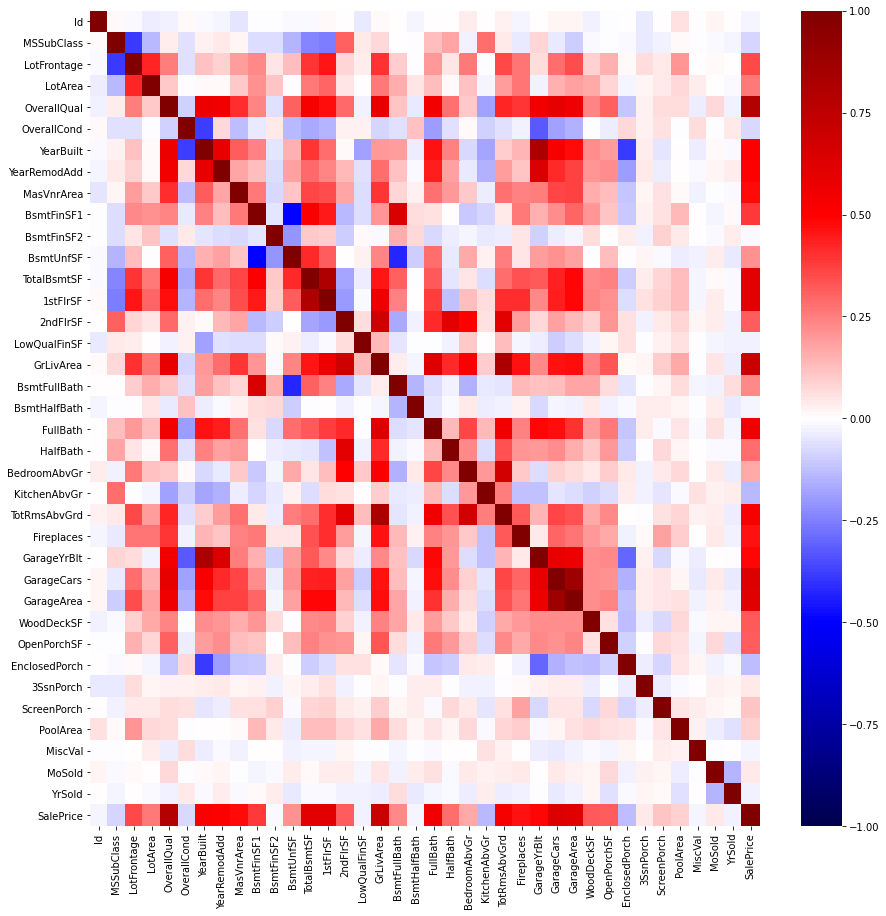

In [6]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), cmap="seismic", vmin=-1, vmax=1, ax=ax);

In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<ipython-input-8-f0e18ea98558>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(df[df.columns[-10:]], ax=ax);


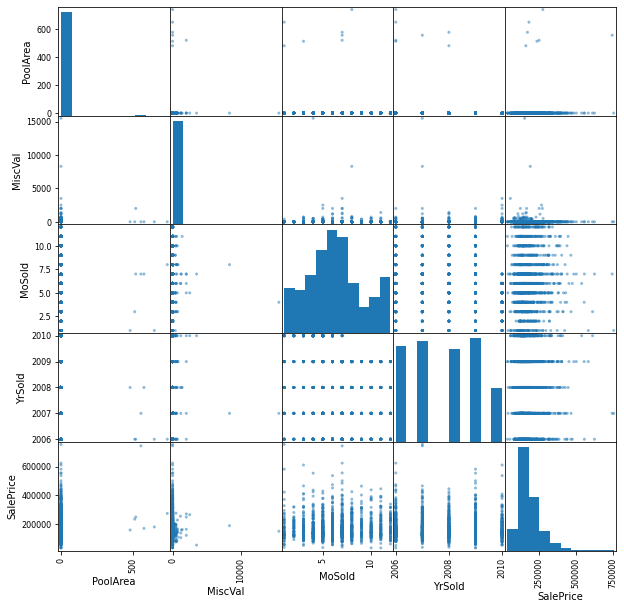

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
pd.plotting.scatter_matrix(df[df.columns[-10:]], ax=ax);

Text(0.5, 1.0, 'House Price vs Lot Area in the South & West of Iowa State University Neighborhood')

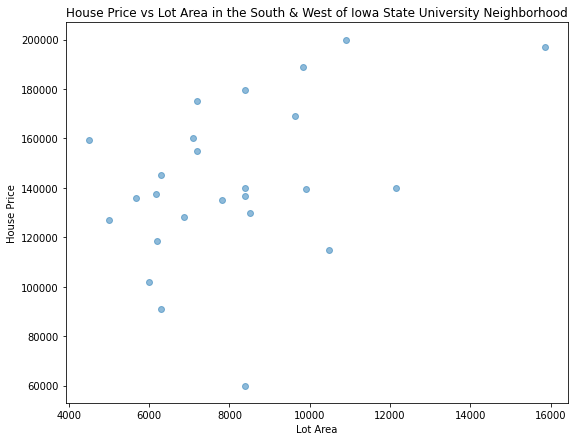

In [9]:
fig, ax = plt.subplots(figsize=(9, 7))

SWISU_x = data[['LotArea']]
SWISU_y = data['SalePrice']

ax.scatter(SWISU_x, SWISU_y, alpha=.5)
ax.set_xlabel('Lot Area')
ax.set_ylabel('House Price')
ax.set_title('House Price vs Lot Area in the South & West of Iowa State University Neighborhood')

In [16]:
lr = LinearRegression()

lr.fit(SWISU_x, SWISU_y)

lr.score(SWISU_x, SWISU_y) #R2


0.16541423008118827

In [ ]:
1 - ((y - y_hat)**2) / (y - mean)**2

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
preds = lr.predict(SWISU_x)

np.sqrt(mean_squared_error(SWISU_y, preds))

r2_score(SWISU_y, preds)

0.16541423008118827

### Plot our predictions

This is easy to do in this case since we only have 1 feature. If we had 2 features we would have to have a 3D plot. If we had >2 features we would be unable to plot our predictions like this. This is the case most of the time.

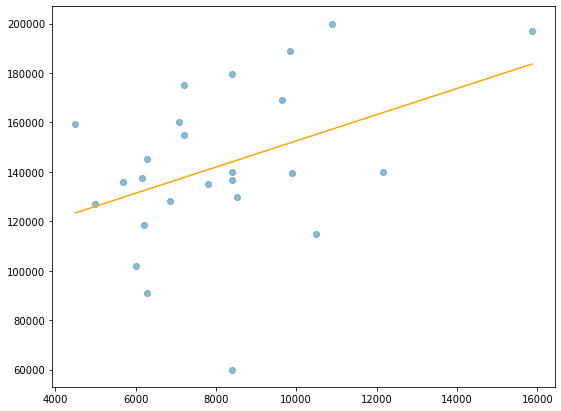

In [24]:
fig, ax = plt.subplots(figsize=(9, 7))

SWISU_x = data[['LotArea']]
SWISU_y = data['SalePrice']
ax.scatter(SWISU_x, SWISU_y, alpha=.5)

_x = np.linspace(SWISU_x.min(), SWISU_x.max())
_y = lr.predict(_x)

ax.plot(_x, _y, color='orange')

### Show the equation of our line

y = mx + b

In [36]:
print(f'slope: {lr.coef_[0]:.2f}')
print(f'y-intercept: {lr.intercept_:.2f}')

slope: 5.30
y-intercept: 99498.54


### Interpretation of Coefficients

Lot Area:

Intercept: 

### Categorical Variables: One Hot Encoding/Dummy Variables

Lets create a model that makes use of one of the categorical variables in our dataset

In [28]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [29]:
df['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [37]:
cat_X = df.loc[:, ['BldgType']]

cat_y = df['SalePrice']

In [38]:
cat_X

,BldgType
0,1Fam
1,1Fam
2,1Fam
3,1Fam
4,1Fam
...,...
1455,1Fam
1456,1Fam
1457,1Fam
1458,1Fam


In [45]:
ohe = OneHotEncoder(drop='first', sparse=False)

ohe.fit(cat_X)

ohe_X = ohe.transform(cat_X)

columns = ohe.get_feature_names(['BldgType'])

ohe_X_df = pd.DataFrame(ohe_X, columns=columns, index=cat_X.index)

ohe_X_df.head()

,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


In [46]:
cat_lr = LinearRegression()

cat_lr.fit(ohe_X_df, cat_y)

cat_lr.score(ohe_X_df, cat_y)

0.0345340268887786

In [47]:
cat_lr.coef_

array([-57331.54931253, -52222.73045397, -49852.17947007,  -3804.46527179])

### Lets combine both the continuous and categorical variables together in one model

In [48]:
combined_df = pd.concat([ohe_X_df, df[['LotArea']]], axis=1)
combined_df.head()

,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,LotArea
0,0.0,0.0,0.0,0.0,8450
1,0.0,0.0,0.0,0.0,9600
2,0.0,0.0,0.0,0.0,11250
3,0.0,0.0,0.0,0.0,9550
4,0.0,0.0,0.0,0.0,14260


In [49]:
combined_lr = LinearRegression()

combined_lr.fit(combined_df, cat_y)

combined_lr.score(combined_df, cat_y)

0.10226283006274473

In [51]:
combined_lr.coef_, combined_lr.intercept_

(array([-6.70198911e+04, -4.89809891e+04, -3.09859512e+04,  9.99761908e+03,
         2.13191569e+00]),
 161799.72248403466)